# CSE 151A Group Project
# Names

- Pranav Prabu
- Sebastian Diaz
- Jou-Chih Chang
- Juan Yin
- Irving Zhao
- Xianzhe Guo
- Tiankuo Li

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/880/data.csv')

df = df[['age','sex','death','dzgroup','scoma','race','sps','aps','diabetes','dementia','meanbp','wblc','hrt','resp','temp','pafi','alb','bili','crea','sod','ph']]

## Initial Preprocessing

In [3]:
# one hot encoding race
ohe = pd.get_dummies(df[['race']])
df = df.drop(['race'], axis = 1)
df = pd.concat([df, ohe], axis = 1)

# dropping nan values
df = df.dropna(axis = 0, how = 'any')

# encoding sex
df['sex'].replace('female', 0, inplace=True)
df['sex'].replace('male', 1, inplace=True)

# one hot encoding dzgroup
ohe = pd.get_dummies(df[['dzgroup']])
df = df.drop(['dzgroup'], axis = 1)

X = df.copy()
y = ohe.copy()
df = pd.concat([df, ohe], axis = 1)

# scaling data
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [4]:
X.head()

,age,sex,death,scoma,sps,aps,diabetes,dementia,meanbp,wblc,...,alb,bili,crea,sod,ph,race_asian,race_black,race_hispanic,race_other,race_white
0,0.544507,1.0,0.0,0.00,0.333700,0.139860,0.0,0.0,0.538889,0.046591,...,0.048945,0.001590,0.060112,0.476923,0.675213,0.0,0.0,0.0,1.0,0.0
1,0.538672,1.0,1.0,0.00,0.164275,0.321678,0.0,0.0,0.433333,0.090846,...,0.153840,0.004769,0.081967,0.338462,0.699633,0.0,0.0,0.0,0.0,1.0
2,0.554409,0.0,1.0,0.26,0.398999,0.405594,0.0,0.0,0.383333,0.233711,...,0.087410,0.220986,0.153014,0.307692,0.661783,0.0,0.0,0.0,0.0,1.0
3,0.383276,0.0,0.0,0.00,0.311257,0.293706,0.0,0.0,0.372222,0.085416,...,0.055945,0.063587,0.027324,0.307692,0.599511,0.0,0.0,0.0,0.0,1.0
4,0.434763,1.0,1.0,0.00,0.132662,0.111888,0.0,0.0,0.744444,0.060566,...,0.118875,0.006359,0.038251,0.476923,0.575091,0.0,0.0,0.0,0.0,1.0


In [5]:
y.head()

,dzgroup_ARF/MOSF w/Sepsis,dzgroup_CHF,dzgroup_COPD,dzgroup_Cirrhosis,dzgroup_Colon Cancer,dzgroup_Coma,dzgroup_Lung Cancer,dzgroup_MOSF w/Malig
0,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0
17,1,0,0,0,0,0,0,0
22,1,0,0,0,0,0,0,0
25,0,0,1,0,0,0,0,0


In [6]:
X.shape

(3840, 24)

# Model 2
## Building the Base Model

In [8]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import RepeatedKFold, cross_val_score

In [9]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [11]:
def buildmodel():
    model = Sequential([
        Dense(units = 72, activation = 'tanh', input_dim = 24),
        Dense(units = 42, activation = 'tanh'),
        Dense(units = 42, activation = 'tanh'),
        Dense(units = 8, activation = 'softmax')
    ])
    model.compile(optimizer ='SGD', loss='categorical_crossentropy')
    return(model)

In [12]:
classifier = buildmodel()
history = classifier.fit(X_train.astype(float), y_train, batch_size = 20, validation_split=0.2, epochs = 100, verbose = 0)
yhat_test = classifier.predict(X_test.astype(float))
yhat_test

24/24 [==============================] - 0s 4ms/step


array([[0.69005686, 0.02135375, 0.0431231 , ..., 0.00167023, 0.00232214,
        0.21527568],
       [0.35831746, 0.34270176, 0.19170852, ..., 0.04741413, 0.02997698,
        0.01456932],
       [0.06655434, 0.00169736, 0.01018071, ..., 0.90343034, 0.00551144,
        0.008448  ],
       ...,
       [0.59955066, 0.02353334, 0.05505592, ..., 0.00358156, 0.0097158 ,
        0.25155202],
       [0.2502979 , 0.05048648, 0.18498641, ..., 0.00985021, 0.31076747,
        0.13160017],
       [0.6032525 , 0.00868686, 0.02049558, ..., 0.01068504, 0.01788861,
        0.28250244]], dtype=float32)

In [13]:
y_label = y_test.to_numpy()
actual = np.argmax(y_label, axis=1)
pred = np.argmax(yhat_test, axis=1)
print(classification_report(actual,pred))

              precision    recall  f1-score   support

           0       0.59      0.84      0.69       344
           1       0.38      0.42      0.40       103
           2       0.42      0.38      0.40        84
           3       0.62      0.12      0.20        41
           4       0.33      0.06      0.11        16
           5       0.78      0.49      0.60        65
           6       0.52      0.26      0.35        46
           7       0.71      0.14      0.24        69

    accuracy                           0.55       768
   macro avg       0.54      0.34      0.37       768
weighted avg       0.56      0.55      0.51       768



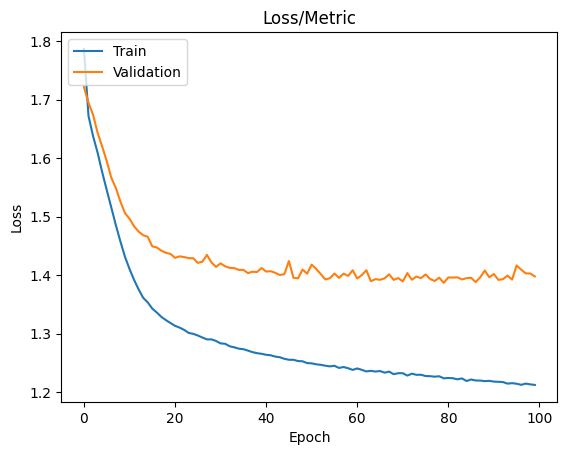

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss/Metric')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## K-Fold Cross-Validation

In [16]:
!pip install scikeras

In [17]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score, cross_validate
import keras
import keras_tuner
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [20]:
def buildmodel():
    model = Sequential([
      Dense(units = 160, activation = 'mish', input_dim = X_train.shape[1]),
      Dense(units = 160, activation = 'mish'),
      Dense(units = 160, activation = 'mish'),
      Dense(units = 160, activation = 'mish'),
      Dense(units = y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['mse','accuracy'])
    return(model)

#epochs are the number of iterative training steps we do on the entire dataset, and each iteration is a step. batch_size is the number of datapoints we select per batch. total obs = batch_size * batches
estimator = KerasClassifier(model=buildmodel, epochs=50, batch_size=20, verbose=0) # before submitting please set verbose = 0, and rerun. If not grading will be no bueno!
kfold = RepeatedKFold(n_splits = 10, n_repeats = 5)
results = cross_val_score(estimator, X_train, y_train, cv=kfold, n_jobs = 1,scoring = 'accuracy')

In [21]:
avg_acc = results.mean()
avg_acc

0.5117807436862811

## Hyperparameter Tuning with Oversampling

In [22]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [28]:
import keras
import keras_tuner
from keras import layers
#build the hyperparameter tuning model with tuning the units, activation function, and learning rates
def build_model(hp):
    model = keras.Sequential()
    activation = hp.Choice("activation", ['relu', 'sigmoid', 'tanh', 'softmax', 'linear', 'leaky_relu', 'mish'])
    # input layer
    model.add(
        layers.Dense(units = hp.Int("units", min_value = 18, max_value = 250, step = 20),
              activation = activation,
              input_dim = X.shape[1]
        )
    )
    # hidden layers
    for i in range(3):
      model.add(
          layers.Dense(
              units = hp.Int("units", min_value = 12, max_value = 250, step = 20),
              activation = activation,
          )
      )
    # output layer
    model.add(
          layers.Dense(
              units = 8,
              activation = 'softmax'
          )
      )
    loss = hp.Choice("loss", values = ["categorical_crossentropy", "mse", "binary_crossentropy"])
    learning_rate = hp.Float("lr", min_value = 0.001, max_value = 0.1, step = 0.01)
    optimizer = hp.Choice("optimizer", values = ["sgd", "adam", "rmsprop"])
    if optimizer == "sgd":
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "adam":
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "rmsprop":
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    model.compile(
        optimizer = optimizer,
        loss = loss,
        metrics = ["accuracy"],
    )
    return model


In [29]:
from sklearn.preprocessing import LabelEncoder
myle=LabelEncoder()
df = pd.read_csv('https://archive.ics.uci.edu/static/public/880/data.csv')

df = df[['age','sex','death','dzgroup','scoma','race','sps','aps','diabetes','dementia','meanbp','wblc','hrt','resp','temp','pafi','alb','bili','crea','sod','ph']]
# label encoding race
df['race'] = myle.fit_transform(df['race'])
# dropping nan values
df = df.dropna(axis = 0, how = 'any')

# encoding sex
df['sex'].replace('female', 0, inplace=True)
df['sex'].replace('male', 1, inplace=True)
print(df['dzgroup'].value_counts())
y = df['dzgroup']
X = df.drop(columns = 'dzgroup')

ARF/MOSF w/Sepsis    1725
CHF                   473
COPD                  447
MOSF w/Malig          338
Coma                  265
Cirrhosis             248
Lung Cancer           246
Colon Cancer           98
Name: dzgroup, dtype: int64


In [30]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print(y_res.value_counts())
ohe = OneHotEncoder()
myohedzgroup = ohe.fit_transform(y_res.values.reshape(-1,1)).toarray()
y_res_ohe = pd.DataFrame(myohedzgroup, columns=ohe.categories_[0])

Lung Cancer          1725
CHF                  1725
ARF/MOSF w/Sepsis    1725
COPD                 1725
MOSF w/Malig         1725
Cirrhosis            1725
Colon Cancer         1725
Coma                 1725
Name: dzgroup, dtype: int64


In [31]:
X_train, X_rem, y_train, y_rem = train_test_split(X_res, y_res_ohe, test_size = 0.2, random_state = 1)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size = 0.3, random_state = 1)

In [32]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=50,
    overwrite=True,
    directory="my_dir",
    project_name="hypertune",
)
tuner.search(X_train, y_train, epochs=50, validation_data = (X_val, y_val), callbacks = [early_stopping], verbose=0)

/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/metrics_tracking.py:111: RuntimeWarning: All-NaN axis encountered
  np.nanmin(values) if self.direction == "min" else np.nanmax(values)
/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/metrics_tracking.py:111: RuntimeWarning: All-NaN axis encountered
  np.nanmin(values) if self.direction == "min" else np.nanmax(values)
/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/metrics_tracking.py:111: RuntimeWarning: All-NaN axis encountered
  np.nanmin(values) if self.direction == "min" else np.nanmax(values)


26/26 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.60      0.45      0.51       101
           1       0.69      0.57      0.62       115
           2       0.68      0.66      0.67        96
           3       0.69      0.92      0.79        95
           4       0.96      0.97      0.97       112
           5       0.90      0.94      0.92        99
           6       0.75      0.93      0.83       114
           7       0.78      0.68      0.73        96

    accuracy                           0.76       828
   macro avg       0.76      0.76      0.75       828
weighted avg       0.76      0.76      0.76       828



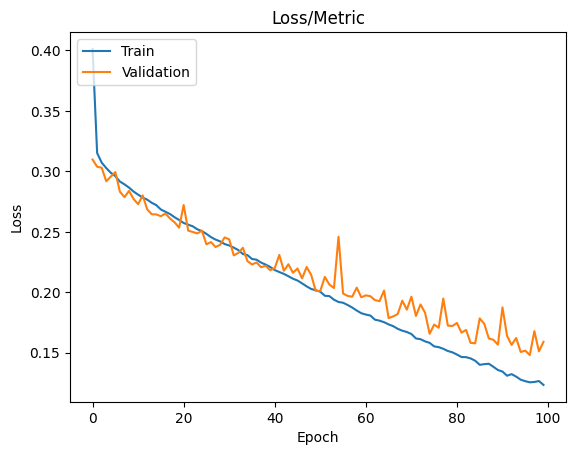

In [35]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

history = model.fit(X_train.astype(float), y_train,epochs=100, verbose = 0, validation_data = (X_val, y_val))

y_label = y_test.to_numpy()
yhat_test = model.predict(X_test.astype(float))
actual = np.argmax(y_label, axis=1)
pred = np.argmax(yhat_test, axis=1)

print(classification_report(actual,pred))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss/Metric')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()